# Custom Tutorial 2: Using your model

In this tutorial, we show you how to use the model you have created. If you have not done so already, go through Custom Tutorial 1 and 1a.

Once you have done this, import PyBEAM's custom sub-module.


In [20]:
# import PyBEAM's custom module
import pybeam.custom as pbc

# also import pyplot to modify a figure
import matplotlib.pyplot as plt

# import os to check if you have input your model directory correctly
import os


Next, we need to tell the program where your model is located. To do this, create a string containing the FULL directory name. This will be input into future functions.

For this example, we use the custom model built in Tutorial 1a, the UGM_flip. The files needed for this model are located on the PyBEAM Github in folder UGM_flip.

To check that we input the directory correctly, we call the function isdir. If it outputs True, then we know we have specificed a directory on our computer.


In [21]:
# the directory containing your model goes here
model_dir = ''

# for windows computer, r before the directory is necessary
# model_dir = r''

# check if directory is input properly
os.path.isdir(model_dir)


True

Next, pybeam.custom provides a tool to test the functions you created in your model.pyx file. To use this, we must first specify a a dictionary of parameter inputs. This has the same form as the deafult sub-module, but instead of referring to the parameters by their names, we refer to them by their array index.

Let's test the model we created in Custom Tutorial 1. First, specify the full directory name where the model is located at as above. Next, define the phi_test dictionary below. This dictionary contains the paramters used by your model. The keys of this dictionary specify which phi index the model.pyx file uses for that parameter, going from 'phi[0]', 'phi[1]', ... 'phi[N_phi-1]'. For example, in the Custom Tutorial 1 model file, parameter phi[0] was associated with the non-decision time. Thus, key 'phi[0]' is the parameter for phi[0], giving the non-decision time. Similarly, 'phi[1]' reference parameter phi[1] which is in the relative start point function.

Once you have this dictionary, call the function functions_test. This accepts inputs of your model_dir location, parameter dictionary phi, accumulator state x, and time t. It outputs a list containing two columns: the model function names and the values output by those model functions. This provides a quick way to check that your functions are doing what you expect them to.

For example, I have set phi[0] to 0.25. Since phi[0] is under the non_decision_time function, I would expect that function to output 0.25. Running functions_test verifies that this is the case and that no programming error has been made.

It is STRONGLY recommended you run this function with any custom model you make.


In [22]:
# dictionary containing model parameters
phi = {'phi[0]' : 0.25, # tnd: non-decision time
       'phi[1]' : 0.5,  # w: relative start point
       'phi[2]' : 1.0,  # mu: drift rate
       'phi[3]' : 3.0,  # l: leakage rate
       'phi[4]' : 2.0,  # k: urgency ratio
       'phi[5]' : 0.5,  # t_flip: time for first drift rate flip
       'phi[6]' : 1.0,  # sigma: model scale
       'phi[7]' : 1.0}  # b: threshold location
    
pbc.functions_test(model_dir = model_dir, # string containing directory where your model files are
                         phi = phi,       # dictionary of model parameters
                           x = 0.0,       # accumulator state
                           t = 1.0)       # time


[['non_decision_time', 0.25],
 ['relative_start', 0.5],
 ['drift', -3.0],
 ['diffusion', 3.0],
 ['upper_decision_threshold', 1.0],
 ['lower_decision_threshold', -1.0],
 ['contamination_strength', 0.0],
 ['contamination_probability', 0.0],
 ['modify_dt', 1.0]]

The remaining functions we introudce in this file are the same as for the pybeam.precoded module. Two changes are present in them. First, instead of defining a model class as you do in the default model, you instead define the model directory. Second, as of now, contamination models can be fit, but they can't be simulated using the simulate function. This functionality will be implemented in a future PyBEAM update. For this example file, we set contamination strength to zero to avoid the issue.


In [23]:
# simulate data from the model
# NOTE: In the present state of PyBEAM, we are not able
# to simulate the contamination model. It still works
# for fitting and plotting purposes.

rt = pbc.simulate(N_sims = 1000,      # number of data points to simulate
               model_dir = model_dir, # string containing directory where your model files are
                     phi = phi)       # model parameters, used to simulate data

rt


{'rt_upper': array([0.4287, 0.5037, 0.4041, 0.7942, 0.5596, 0.5919, 0.4656, 0.7005,
        0.3852, 0.4779, 0.7131, 0.407 , 0.534 , 0.678 , 0.9009, 0.457 ,
        0.5595, 0.459 , 0.7324, 0.449 , 0.6943, 0.6591, 0.4658, 0.5122,
        0.5228, 0.5327, 0.6168, 0.6534, 0.5875, 0.5063, 0.7931, 0.5561,
        0.6953, 0.9033, 0.6688, 0.6685, 0.5787, 0.6558, 0.4597, 0.4119,
        0.8916, 0.5358, 0.4799, 0.7299, 1.0895, 1.0179, 0.6519, 0.6244,
        0.6996, 0.5837, 0.7205, 0.6583, 0.6203, 0.5785, 0.9952, 0.4837,
        0.6659, 0.6116, 0.6282, 0.4316, 0.6511, 0.6516, 0.6658, 0.9019,
        0.6482, 0.4511, 0.5675, 0.4689, 0.7079, 0.787 , 0.5387, 0.5188,
        1.0909, 0.6338, 0.665 , 0.5489, 0.64  , 0.695 , 0.696 , 0.412 ,
        0.5347, 0.5672, 0.7531, 0.8552, 0.8573, 0.5316, 0.5933, 0.4487,
        0.8824, 0.5523, 0.7888, 0.5371, 0.6421, 0.4799, 0.5703, 0.6435,
        0.621 , 0.6006, 0.6975, 0.4829, 0.4124, 0.7801, 0.621 , 0.6539,
        0.4881, 0.4459, 0.4897, 0.8088, 0.5238, 0.53

In [24]:
# calculte model likelihood function
lh = pbc.likelihood(model_dir = model_dir, # string containing directory where your model files are
                          phi = phi,       # dictionary of model parameters, used to simulate data
                       rt_max = 2.0)       # maximum time to solve likelihood function to

lh


{'time': array([0.25010375, 0.2502075 , 0.25031125, 0.250415  , 0.25051875,
        0.2506225 , 0.25072625, 0.25083   , 0.25093375, 0.2510375 ,
        0.25114125, 0.251245  , 0.25134875, 0.2514525 , 0.25155625,
        0.25166   , 0.25176375, 0.2518675 , 0.25197125, 0.252075  ,
        0.25217875, 0.2522825 , 0.25238625, 0.25249   , 0.25259375,
        0.25280021, 0.25310939, 0.25352127, 0.25403588, 0.25465319,
        0.25537321, 0.25619595, 0.2571214 , 0.25814956, 0.25928044,
        0.26051402, 0.26185032, 0.26328934, 0.26483106, 0.2664755 ,
        0.26822265, 0.27007251, 0.27202509, 0.27408037, 0.27623837,
        0.27849909, 0.28086251, 0.28332865, 0.2858975 , 0.28856906,
        0.29134334, 0.29422033, 0.29720003, 0.30028244, 0.30346756,
        0.3067554 , 0.31014595, 0.31363921, 0.31723519, 0.32093388,
        0.32473528, 0.32863939, 0.33264621, 0.33675575, 0.340968  ,
        0.34528296, 0.34970064, 0.35422103, 0.35884413, 0.36356994,
        0.36839846, 0.3733297 , 0.378363

In [25]:
# calculate loglikelihood of rt data using model's likelihood function
ll = pbc.loglikelihood(model_dir = model_dir, # string containing directory where your model files are
                             phi = phi,       # model parameters, used to simulate data
                              rt = rt)        # dictionary of rt data

ll


-273.6523068781158

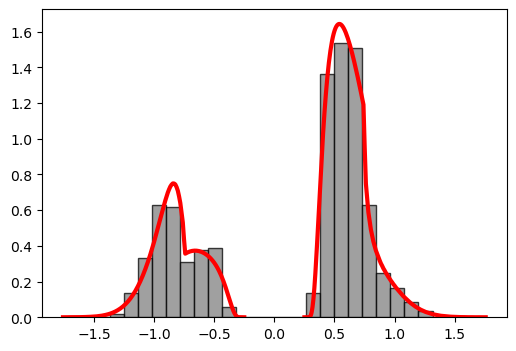

In [26]:
# plot data and model likelihood function
pbc.plot_rt(model_dir = model_dir, # string containing directory where your model files are
                  phi = phi,       # model parameters, used to simulate data
               rt_max = 1.75,      # maximum time to solve likelihood function to
                   rt = rt);       # dictionary of rt data
